In [21]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

import glob

In [2]:
# define the years 
Year = list(range(2001,2009)) + list(range(2013,2019))

In [3]:
# read MODIS_Climate csv

all_csv = glob.glob('./Data/*.csv')
all_df = []

for f in all_csv:
    # reand the df and parse date
    df = pd.read_csv(f,parse_dates=['Date'],date_parser= lambda x: datetime.strptime(x, "%Y_%m_%d")).drop('X',1)
    # create Day of year column
    df['Day_of_Year'] = df['Date'].dt.dayofyear
    
    all_df.append(df)

In [4]:
all_df[0]

,Date,dewpoint_2m_temperature,maximum_2m_air_temperature,mean_2m_air_temperature,mean_sea_level_pressure,minimum_2m_air_temperature,surface_pressure,total_precipitation,u_component_of_wind_10m,v_component_of_wind_10m,NDVI,Name,Day_of_Year
0,2001-01-02,272.064575,282.056998,278.353960,102254.052504,273.617831,101557.030114,1.862645e-09,0.840412,0.233821,0.387465,上蔡县,2
1,2001-01-03,270.255792,279.008149,275.206540,102618.242953,272.549651,101903.860469,4.284084e-08,-1.244699,-2.419022,0.120914,上蔡县,3
2,2001-01-07,272.209771,275.425242,273.693676,102326.625375,270.332087,101608.514266,5.570087e-03,-0.921020,-2.970269,0.289191,上蔡县,7
3,2001-01-09,271.051636,274.665287,272.210990,102581.887209,269.563906,101862.060915,1.225829e-06,0.388386,1.783465,0.018285,上蔡县,9
4,2001-01-10,272.233286,279.421882,275.098666,101732.241632,270.855175,101029.873834,1.862645e-09,2.602304,1.375216,0.181111,上蔡县,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
221,2001-12-25,262.043263,274.226597,271.578690,103848.718690,265.507917,103115.161736,0.000000e+00,-0.403797,0.509810,0.442301,上蔡县,359
222,2001-12-27,266.436877,278.996294,273.399972,103504.411446,268.223229,102784.802312,0.000000e+00,1.230625,-0.419667,0.298237,上蔡县,361
223,2001-12-28,267.859102,282.322193,276.544379,102818.926952,271.264223,102112.249605,0.000000e+00,3.101723,-0.082607,0.388782,上蔡县,362
224,2001-12-29,268.208917,285.196599,277.029036,102378.863780,271.087512,101681.303569,0.000000e+00,2.492154,-0.201613,0.387797,上蔡县,363


In [5]:
all_df[0].columns

Index(['Date', 'dewpoint_2m_temperature', 'maximum_2m_air_temperature',
       'mean_2m_air_temperature', 'mean_sea_level_pressure',
       'minimum_2m_air_temperature', 'surface_pressure', 'total_precipitation',
       'u_component_of_wind_10m', 'v_component_of_wind_10m', 'NDVI', 'Name',
       'Day_of_Year'],
      dtype='object')

<AxesSubplot:xlabel='Date', ylabel='NDVI'>

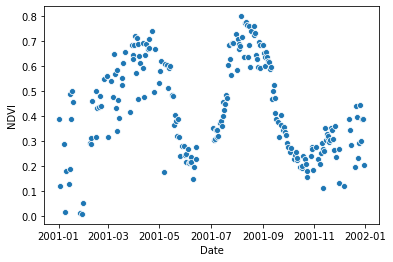

In [16]:
sns.scatterplot(data=all_df[0],x='Date',y='NDVI') 

In [17]:
df = all_df[0]

In [18]:
pcp = df['NDVI']

In [19]:
pcp

0      0.387465
1      0.120914
2      0.289191
3      0.018285
4      0.181111
         ...   
221    0.442301
222    0.298237
223    0.388782
224    0.387797
225    0.203680
Name: NDVI, Length: 226, dtype: float64

<AxesSubplot:>

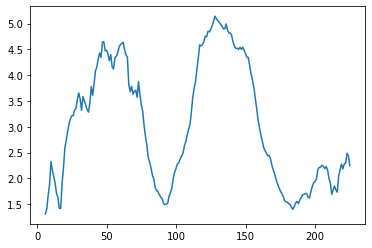

In [20]:
N = 7
pcp.rolling(7).sum().plot()